### Samples of fetching Product View with Mark2Market

This first section loads a token from a local .env file 

In [1]:
# Import relevant libraries
import sys,os
from os.path import join, dirname
from dotenv import load_dotenv

sys.path.insert(1, os.path.join(sys.path[0], '..'))  # Hack to include parent directory in search path

# Loading token, url etc from .env file in current directory
load_dotenv('.env')
token = os.environ.get("ENERGYDESK_TOKEN")
server_url = os.environ.get("ENERGYDESK_URL")
print("Using server ", server_url)

Using server  https://api.celsio.energydesk.no


### Initialize the Python SDK which wraps sme useful REST calls ###

In [2]:
from energydeskapi.sdk.common_utils import init_api_from_environment
from energydeskapi.customers.customers_api import CustomersApi
from energydeskapi.customers.users_api import UsersApi
from energydeskapi.portfolios.portfoliotree_api import PortfolioTreeApi, PortfoliosApi
from energydeskapi.types.company_enum_types import CompanyTypeEnum, CompanyRoleEnum
import pandas as pd
import json
api_connection=init_api_from_environment()
print(api_connection.token)
jsdata=PortfoliosApi.get_portfolios_embedded(api_connection)
df=pd.DataFrame(data=jsdata)
print(df[['pk', 'description']])


Not setting token   Token
Token setting token  d2b72952fb341d08b1eee1a1aada79c1a6971fa1 Token
d2b72952fb341d08b1eee1a1aada79c1a6971fa1
   pk               description
0   1        Systematic Sikring
1   2             Adhoc Sikring
2   3                   Sikring
3   4         Elektrisk Forbruk
4   5  Brensler Varmeproduksjon
5   6                 Varmesalg
6   7   Salg av Produsert kraft
7   8                   Forbruk
8   9                      Salg
9  10              Celsio Total


## Calculate Portfolio ##

In [12]:
from energydeskapi.sdk.common_utils import init_api
from energydeskapi.assets.assets_api import AssetsApi
from energydeskapi.portfolios.portfolioviews_api import PortfolioViewsApi
from energydeskapi.types.company_enum_types import CompanyTypeEnum, CompanyRoleEnum
import pandas as pd
import matplotlib.mlab as mlab
import numpy as np
import matplotlib
import pendulum
import scipy
from IPython.display import display_html
from itertools import chain,cycle
from scipy.stats import norm
from matplotlib import pyplot as plt
from energydeskapi.risk.risk_api import RiskApi

guid, viewdata=PortfolioViewsApi.get_product_view(api_connection, {'portfolio':3, "view_currency":"NOK",'commodity__delivery_until__gte':str(pendulum.today())})
lst=[]

if len(viewdata)>0:
    for row in json.loads(viewdata):
        #print(row)
        lst.append({'ticker':row['ticker'],'From':row['delivery_from'],'To':row['delivery_until'],
                    'buypos':row['buypos'],
                    'sellpos':row['sellpos'],'Cost(Buy)':row['avgcostbuy'],'Cost(sell)':row['avgcostsell'],'Closing':row['close'],'M2M (urealisert)':row['unreal'],
                    'MW':row['netpos'],'MWh':row['netvol']})
    df=pd.DataFrame(data=lst)
    display_html(df.to_html(),raw=True)
else:
    df=pd.DataFrame()

,ticker,From,To,buypos,sellpos,Cost(Buy),Cost(sell),Closing,M2M (urealisert),MW,MWh
0,ENOFUTBLQ1-24,2023-12-31T23:00:00.000Z,2024-03-30T23:00:00.000Z,0.00,-15.00,0.000000,1138.110000,900.341799,-7.703690e+06,-15.0,-32400.0
1,ENOFUTBLQ3-23,2023-06-30T22:00:00.000Z,2023-09-29T22:00:00.000Z,12.00,0.00,817.021667,0.000000,0.000000,0.000000e+00,12.0,26208.0
2,ENOFUTBLYR-23,2022-12-31T23:00:00.000Z,2023-12-30T23:00:00.000Z,41.00,-70.00,362.480000,326.755676,0.000000,0.000000e+00,-29.0,-253344.0
3,ENOFUTBLYR-24,2023-12-31T23:00:00.000Z,2024-12-30T23:00:00.000Z,25.00,-53.00,818.625185,253.800308,664.888946,1.571920e+08,-28.0,-245280.0
4,ENOFUTBLYR-25,2024-12-31T23:00:00.000Z,2025-12-30T23:00:00.000Z,44.38,-54.38,518.864467,501.995104,598.223657,7.648254e+07,-10.0,-87360.0
5,ENOFUTBLYR-26,2025-12-31T23:00:00.000Z,2026-12-30T23:00:00.000Z,1.42,-1.42,355.710000,355.710000,539.256909,4.553843e+06,0.0,0.0
6,SYOSLFUTBLQ3-23,2023-06-30T22:00:00.000Z,2023-09-29T22:00:00.000Z,0.00,-4.00,0.000000,375.025000,0.000000,0.000000e+00,-4.0,-8736.0
7,SYOSLFUTBLQ4-23,2023-09-30T22:00:00.000Z,2023-12-30T23:00:00.000Z,0.00,-2.00,0.000000,398.520000,168.094485,-1.006960e+06,-2.0,-4370.0


            ticker                      From                        To  \
0    ENOFUTBLQ1-24  2023-12-31T23:00:00.000Z  2024-03-30T23:00:00.000Z   
1    ENOFUTBLQ3-23  2023-06-30T22:00:00.000Z  2023-09-29T22:00:00.000Z   
2    ENOFUTBLYR-23  2022-12-31T23:00:00.000Z  2023-12-30T23:00:00.000Z   
3    ENOFUTBLYR-24  2023-12-31T23:00:00.000Z  2024-12-30T23:00:00.000Z   
4    ENOFUTBLYR-25  2024-12-31T23:00:00.000Z  2025-12-30T23:00:00.000Z   
5    ENOFUTBLYR-26  2025-12-31T23:00:00.000Z  2026-12-30T23:00:00.000Z   
6  SYOSLFUTBLQ3-23  2023-06-30T22:00:00.000Z  2023-09-29T22:00:00.000Z   
7  SYOSLFUTBLQ4-23  2023-09-30T22:00:00.000Z  2023-12-30T23:00:00.000Z   

   buypos  sellpos   Cost(Buy)   Cost(sell)     Closing  M2M (urealisert)  \
0    0.00   -15.00    0.000000  1138.110000  900.341799     -7.703690e+06   
1   12.00     0.00  817.021667     0.000000    0.000000      0.000000e+00   
2   41.00   -70.00  362.480000   326.755676    0.000000      0.000000e+00   
3   25.00   -53.00  818.6

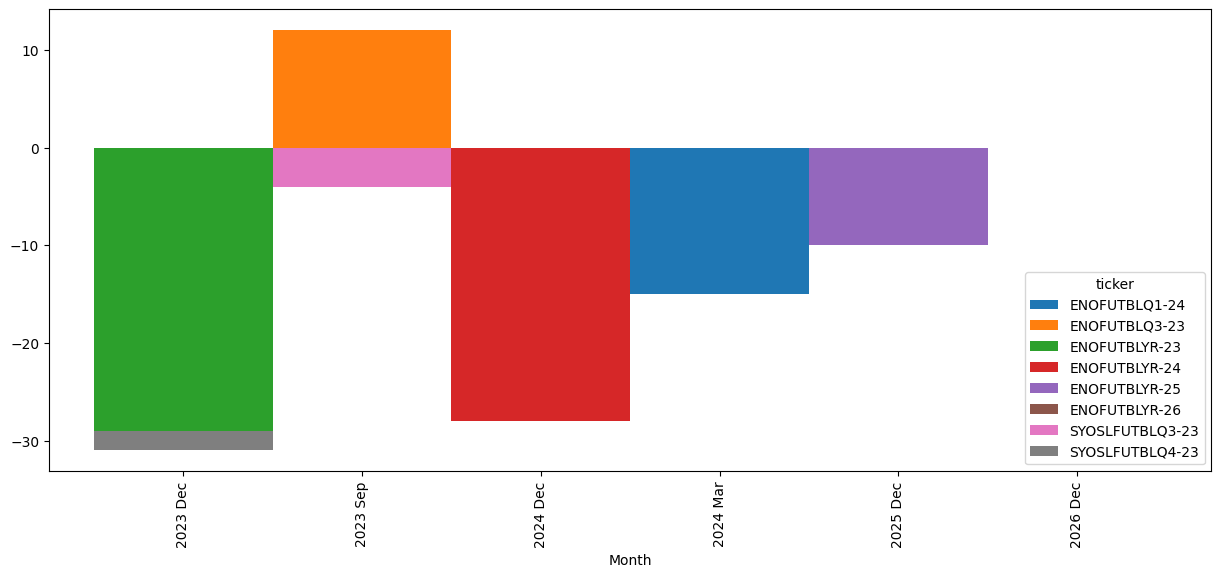

In [14]:
from dateutil import parser
fig,ax = plt.subplots(figsize=(15,6))
if len(df)>0:
      df['Month']=df.apply(lambda x: parser.isoparse(x['To']).strftime("%Y %b"), axis=1)
      print(df)
      df2=df.pivot(index='Month', columns='ticker')['MW']
      df2.plot(kind='bar',width=1.0, ax=ax,stacked=True)
      plt.show()
else:
      print("Empty dataset")